# Анализ данных сервиса GoFast

В нашем распоряжении данные о некоторых пользователях сервиса из нескольких городов, а также об их поездках. Наша цель: проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Сервисом можно пользоваться:
* без подписки
    * абонентская плата отсутствует;
    * стоимость одной минуты поездки — 8 рублей;
    * стоимость старта (начала поездки) — 50 рублей;
* с подпиской Ultra
    * абонентская плата — 199 рублей в месяц;
    * стоимость одной минуты поездки — 6 рублей;
    * стоимость старта — бесплатно.

## Описание данных:

Таблица "Пользователи" (`users_go.csv`):
* `user_id` - уникальный идентификатор пользователя
* `name` - имя пользователя
* `age` - возраст
* `city` - город
* `subscription_type` - тип подписки (free, ultra)


Таблица "Поездки" (`rides_go.csv`):
* `distance` - расстояние, которое пользователь проехал в текущей сессии (в метрах)
* `duration` - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
* `date` - дата совершения поездки

Таблица "Подписки" (`subscriptions_go.csv`):
* `subscription_type` - тип подписки
* `minute_price` - стоимость одной минуты поездки по данной подписке
* `start_ride_price` - стоимость начала поездки
* `subscription_fee` - стоимость ежемесячного платежа

## Ознакомление с данными

Импортируем библиотеки и прочитаем файлы.

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
from math import factorial
from math import sqrt
import numpy as np
import warnings


warnings.filterwarnings("ignore")
sns.set(style="darkgrid")

In [2]:
try:
    users_go = pd.read_csv('/home/aart/datasets/users_go.csv')
    rides_go = pd.read_csv('/home/aart/datasets/rides_go.csv')
    subscriptions_go = pd.read_csv('/home/aart/datasets/subscriptions_go.csv')
except:
    users_go = pd.read_csv('/datasets/users_go.csv')
    rides_go = pd.read_csv('/datasets/rides_go.csv')
    subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
display(users_go.describe().T, users_go.info(), users_go.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,count,mean,std,min,25%,50%,75%,max
user_id,1565.0,762.633866,443.260155,1.0,378.0,762.0,1146.0,1534.0
age,1565.0,24.922045,4.553496,12.0,22.0,25.0,28.0,43.0


None

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
display(rides_go.describe().T, rides_go.info(), rides_go.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,count,mean,std,min,25%,50%,75%,max
user_id,18068.0,842.869936,434.734317,1.000000,487.000000,889.000000,1213.250000,1534.000000
distance,18068.0,3070.659976,1116.831209,0.855683,2543.226360,3133.609994,3776.222735,7211.007745
duration,18068.0,17.805011,6.091051,0.500000,13.597563,17.678395,21.724800,40.823963


None

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
display(subscriptions_go.describe().T, subscriptions_go.info(), subscriptions_go.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,count,mean,std,min,25%,50%,75%,max
minute_price,2.0,7.0,1.414214,6.0,6.50,7.0,7.50,8.0
start_ride_price,2.0,25.0,35.355339,0.0,12.50,25.0,37.50,50.0
subscription_fee,2.0,99.5,140.714249,0.0,49.75,99.5,149.25,199.0


None

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Данные хорошего качества, хорошо структурированы, без пропусков. Из сразу заметного можно отметить лишь то, что даты в датафрейме `rides_go` хранятся как объекты. Займемся предобработкой данных.

## Предобработка данных

### Изменение типов данных

In [6]:
rides_go.date = pd.to_datetime(rides_go.date)
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Имея даты в верном формате `datetime` извлечем месяц отдельно.

In [7]:
rides_go['month'] = rides_go.date.dt.month
rides_go.head(3)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4


Заодно можно проверить данные за какой период нам предоставлены:

In [8]:
print('Самая ранняя запись:', rides_go.date.min())
print('Самая поздняя запись:',rides_go.date.max())

Самая ранняя запись: 2021-01-01 00:00:00
Самая поздняя запись: 2021-12-30 00:00:00


В нашем распоряжении данные за 2021 год.

### Обработка дубликатов и пропусков

Теперь изучим датафреймы на предмет дубликатов и пропусков.

In [9]:
print('Количество пропусков в датафрейме users_go:', users_go.isna().sum().sum())
print('Количество пропусков в датафрейме rides_go:', rides_go.isna().sum().sum())
print('Количество пропусков в датафрейме subscriptions_go:', subscriptions_go.isna().sum().sum())

Количество пропусков в датафрейме users_go: 0
Количество пропусков в датафрейме rides_go: 0
Количество пропусков в датафрейме subscriptions_go: 0


Проблем нет.

In [10]:
print('Количество явных дубликатов в датафрейме users_go:', users_go.duplicated().sum())
print('Количество явных дубликатов в датафрейме rides_go:', rides_go.duplicated().sum())
print('Количество явных дубликатов в датафрейме subscriptions_go:', subscriptions_go.duplicated().sum())

Количество явных дубликатов в датафрейме users_go: 31
Количество явных дубликатов в датафрейме rides_go: 0
Количество явных дубликатов в датафрейме subscriptions_go: 0


Дубликаты явные и полные, избавимся от них.

In [11]:
users_go = users_go.drop_duplicates()

На этом этап предобработки закончен. Как было сказано раннее - имеющиеся данные высокого качества, хорошо структурированные, не содержащие пропусков и пригодные для последующей работы. Единственное что требовало внимания и исправления - неверный формат хранения дат и незначительное количество дубликатов.

## Исследовательский анализ даных

Изучим некоторые параметры подробнее.

### Частота встречаемости городов

Начнем с частоты встречаемости городов, участвующих в исследовании:

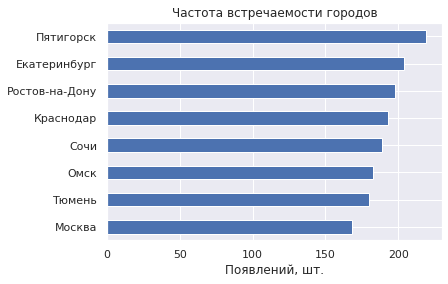

In [12]:
ax = users_go.city.value_counts().sort_values().plot.barh()
plt.title('Частота встречаемости городов');
plt.xlabel('Появлений, шт.');

In [13]:
users_go.city.value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

Любопытно, что сервис пользуется большей популярностью в регионах, чем в столице.

### Отношение пользователей с подпиской ко всем пользователям

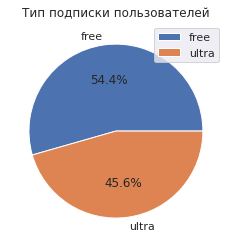

In [14]:
ax = users_go.subscription_type.value_counts().plot(kind='pie', autopct="%.1f%%", 
                                                    title='Тип подписки пользователей',
                                                    ylabel='', legend=True)

Больше чем у 45% всех пользователей есть платная подписка - очень впечатляющий результат.

### Возраст пользователей

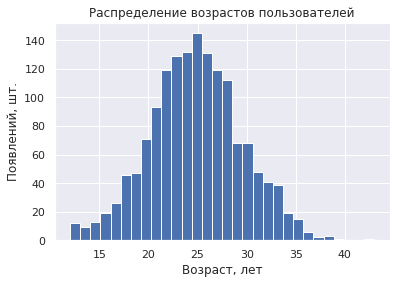

In [15]:
ax = users_go.age.hist(bins=30);
plt.title('Распределение возрастов пользователей');
plt.xlabel('Возраст, лет');
plt.ylabel('Появлений, шт.');

In [16]:
users_go.age.describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Распределение похоже на нормальное, основная ЦА сервиса - молодые люди до 30 лет, что ожидаемо. Средний возраст пользователя - ~25 лет. Минимальный - 12, максимальный - 43.

### Расстояние поездок

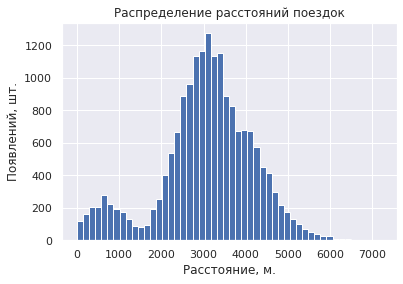

In [17]:
ax = rides_go.distance.hist(bins=50);
plt.title('Распределение расстояний поездок');
plt.xlabel('Расстояние, м.');
plt.ylabel('Появлений, шт.');

Распределение бимодально, пики более подробно будет рассмотрены ниже.

### Продолжительность поездок

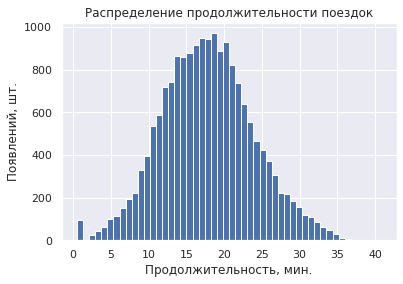

In [18]:
rides_go.duration.hist(bins=50);
plt.title('Распределение продолжительности поездок');
plt.xlabel('Продолжительность, мин.');
plt.ylabel('Появлений, шт.');

Распределение ближе к нормальному, чем распределение расстояний. Заметен странный пик - ну очень непродолжительные поездки. Рассмотрим их подробнее.

In [19]:
rides_go.query('duration<2')

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


Здесь что-то неладно. Проверим сабсет на уникальные значения.

In [20]:
rides_go.query('duration<2').duration.unique()

array([0.5])

Удивительно, но все такие поездки имеют продолжительность 30 секунд. Я бы предположил, что это могли быть служебные, тестовые поездки призванные проверить какой-то новый функционал, но поездки имеют разный `user_id`. Вернемся к этому моменту, когда у нас будет объединенный цельный датафрейм

## Объединение данных

Образуем один большой датафрейм.

In [21]:
gofast = pd.merge(users_go,
                rides_go,
                on='user_id',
                how='left')
gofast = pd.merge(gofast,
                subscriptions_go,
                on='subscription_type',
                how='left')

In [22]:
gofast.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [23]:
gofast.shape[0] == rides_go.shape[0]

True

Ни одна поездка не осталась неучтенной. 

Разделим итоговый датафрейм еще на два - с данными о пользователях с и без подписки для дальнейшего исследования групп.


In [24]:
gofast_ultra = gofast.query("subscription_type == 'ultra'")
gofast_free = gofast.query("subscription_type == 'free'")

Интересно будет посмотреть на разницу расстояний и времени поездок для каждой категории.

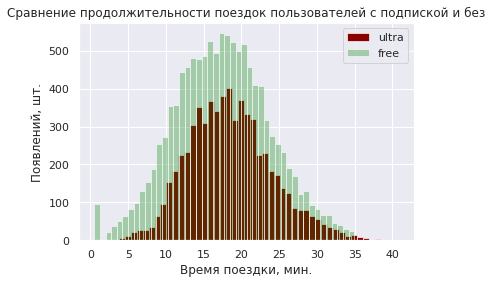

In [25]:
sns.histplot(x=gofast_ultra.duration, color='darkred',alpha=1);
sns.histplot(x=gofast_free.duration, color='green', alpha=0.3);
plt.title('Сравнение продолжительности поездок пользователей с подпиской и без');
plt.xlabel('Время поездки, мин.');
plt.ylabel('Появлений, шт.');
plt.legend(labels=['ultra','free']);

Распределения очень похожи. Перекос в более долгие поездки у пользователей с платной подпиской (>35 мин.) почти незаметен, точно как и перекос в короткие поездки (<5 мин.). Интересен пик в районе поездок продолжительностью ~1 мин. у пользователей без подписки. Возможно, это первые опыты людей с сервисом - люди пытаются разобраться, как работает система.

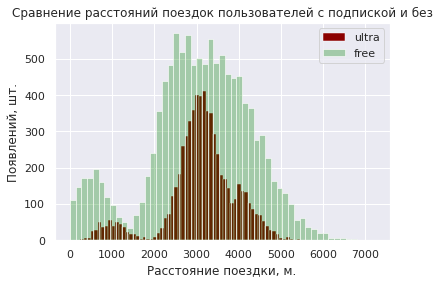

In [26]:
sns.histplot(x=gofast_ultra.distance, color='darkred',alpha=1);
sns.histplot(x=gofast_free.distance, color='green', alpha=0.3);
plt.title('Сравнение расстояний поездок пользователей с подпиской и без');
plt.xlabel('Расстояние поездки, м.');
plt.ylabel('Появлений, шт.');
plt.legend(labels=['ultra','free']);

В распределениях расстояния поездок тоже есть сходство. Оба мультимодальны. Пользователи без подписки более склонны как и к очень коротким, так и к наиболее длинным поездкам. Любопытен провал в районе 1.5 км у обоих групп пользователей.
Мне кажется два пика можно объяснить таким образом: пик в районе ~1км. - непродолжительные развлекательные поездки в одной местности - вокрук водоема, по определенному парку и подобное. Более продолжительный пик: поездки, направленные либо на достижение определенной точки в городе (с утилитарной целью), или же наоборот - продолжительные поездки по нескольким районам города для ознакомления/перепосещения достопримечательностей. Такое может пользоваться большим спросом у впервые посещающих город. Для проверки такой теории пригодились бы данные о местоположении точек аренды самокатов.

### Аномалия 30 секунд

Имея на руках цельный объединенный датафрейм, вернемся к обнаруженной ранее аномалии.

In [27]:
display(gofast.query('duration<2'), gofast.query('duration<2').describe())

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6531,701,Иван,31,Екатеринбург,free,4196.445201,0.5,2021-08-31,8,8,50,0
6570,704,Мирон,29,Ростов-на-Дону,free,4830.824371,0.5,2021-10-14,10,8,50,0
6680,712,Дарья,28,Москва,free,4684.004397,0.5,2021-03-04,3,8,50,0
6695,713,Святослав,30,Краснодар,free,5215.642710,0.5,2021-02-25,2,8,50,0
6768,718,Владислава,31,Москва,free,5197.436649,0.5,2021-02-11,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17004,1460,Жанна,27,Пятигорск,free,5531.335845,0.5,2021-01-19,1,8,50,0
17242,1477,Ян,17,Сочи,free,6724.932981,0.5,2021-01-12,1,8,50,0
17314,1483,Роберт,26,Екатеринбург,free,4445.481070,0.5,2021-03-06,3,8,50,0
17505,1496,Яна,19,Москва,free,5722.551787,0.5,2021-02-14,2,8,50,0


,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,95.000000,95.000000,95.000000,95.0,95.000000,95.0,95.0,95.0
mean,1092.210526,25.442105,5113.176549,0.5,6.484211,8.0,50.0,0.0
std,244.028551,4.350876,658.254104,0.0,3.709858,0.0,0.0,0.0
min,701.000000,13.000000,4030.308008,0.5,1.000000,8.0,50.0,0.0
25%,901.000000,22.500000,4611.510820,0.5,3.000000,8.0,50.0,0.0
50%,1069.000000,25.000000,5052.769411,0.5,6.000000,8.0,50.0,0.0
75%,1310.500000,29.000000,5488.459099,0.5,10.000000,8.0,50.0,0.0
max,1524.000000,36.000000,7211.007745,0.5,12.000000,8.0,50.0,0.0


Видно, что все строки объединяет бесплатный тариф и неправдоподобно большие для продолжительности в 30 секунд преодоленные расстояния - от 4 до 7+ км. Учитывая максимум в 7200 м., это значило бы, что самокаты способны разгоняться до 240 м/c, или 864 км/ч, что почти равно скорости пассажирского самолета. Исходя из этого предполагаю, что эти данные ошибочны, и попали в датафрейм по ошибке. Стоит удалить их, чтобы не повредить проверке гипотез.

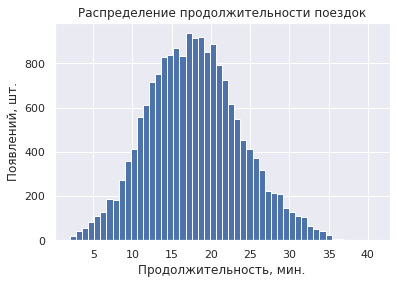

In [28]:
gofast = gofast[gofast.duration > 2]
gofast.duration.hist(bins=50);
plt.title('Распределение продолжительности поездок');
plt.xlabel('Продолжительность, мин.');
plt.ylabel('Появлений, шт.');

## Подсчет выручки

Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными. В него будут входить суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [29]:
#округление времени
gofast.duration = np.ceil(gofast.duration)

gofast_revenue = gofast.pivot_table(index=['subscription_type', 'user_id', 'month',
                                          'minute_price', 'start_ride_price', 'subscription_fee'],
                                    values=['distance', 'duration'],
                                    aggfunc={'distance' : ['sum', 'count'], 'duration' : 'sum'})
gofast_revenue.reset_index(inplace=True)
#избавляемся от мультиуровневых индексов
gofast_revenue = gofast_revenue.droplevel(1,axis=1)
#избавляемся от одинаковых названий и вносим ясность
gofast_revenue.columns = ['subscription_type', 'user_id', 'month', 'minute_price', 
                          'start_ride_price', 'subscription_fee','overall_trips',
                          'overall_distance', 'overall_duration_min']

Рассчитаем выручку за каждого пользователя за каждый месяц:

In [30]:
gofast_revenue['revenue_rub'] = (gofast_revenue.start_ride_price * gofast_revenue.overall_trips) + (gofast_revenue.minute_price * gofast_revenue.overall_duration_min) + gofast_revenue.subscription_fee

In [31]:
gofast_revenue.head()

,subscription_type,user_id,month,minute_price,start_ride_price,subscription_fee,overall_trips,overall_distance,overall_duration_min,revenue_rub
0,free,700,1,8,50,0,1,2515.690719,15.0,170.0
1,free,700,2,8,50,0,5,13446.659764,89.0,962.0
2,free,700,3,8,50,0,1,3798.334905,19.0,202.0
3,free,700,4,8,50,0,1,2984.551206,16.0,178.0
4,free,700,6,8,50,0,2,5927.650988,29.0,332.0


## Проверка гипотез

Заказчик требует проверить три гипотезы.

### 1. Тратят ли пользователи с подпиской больше времени на поездки?

* $H_0$ - пользователи с подпиской тратят столько же времени на поездки.
* $H_1$ - пользователи с подпиской тратят больше времени на поездки.

In [32]:
alpha = 0.05
results = st.ttest_ind(gofast_ultra.duration, gofast_free.duration, alternative='greater')
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Пользователи с подпиской тратят больше времени на поездки - ведь длинные поездки для них более выгодны. Можно в этом убедиться, сравнив средние:

In [33]:
print(f'Средняя продолжительность поездки пользователя с подпиской: {round(gofast_ultra.duration.mean(),2)} мин.')
print(f'Средняя продолжительность поездки пользователя без подписки: {round(gofast_free.duration.mean(),2)} мин.') 

Средняя продолжительность поездки пользователя с подпиской: 18.54 мин.
Средняя продолжительность поездки пользователя без подписки: 17.39 мин.


Справедливости ради, разница не так велика.

### 2. Гипотеза об износе самокатов 

* $H_0$ - истинное среднее расстояние одной поездки равно гипотетическому значению 3130 м.
* $H_1$ - истинное среднее расстояние одной поездки больше.

In [34]:
optimal_wear = 3130
alpha = 0.05
results = st.ttest_1samp(gofast.query("subscription_type == 'ultra'").distance, optimal_wear, alternative='greater')
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.9195368847849785
Нет оснований отвергнуть нулевую гипотезу


Самокаты в среднем не подвергаются дополнительному износу.

### 3. Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

* $H_0$ - помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки.
* $H_1$ - помесячная выручка от пользователей с подпиской выше.

In [35]:
alpha = 0.05
results = st.ttest_ind(gofast_revenue.query('subscription_type == "ultra"').revenue_rub,
                       gofast_revenue.query('subscription_type == "free"').revenue_rub,
                       alternative='greater')

print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 2.0314113674863288e-30
Отвергаем нулевую гипотезу


Помесячная выручка от пользоваталей с подпиской больше, значит тариф достаточно выгоден чтобы поощрать частое использование сервисом.

### 4. Вопрос от заказчика

Заказчик интересуется подобной ситуацией:

Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

В этой ситуации понадобится тест ttest_rel.

## Распределения

### Промокоды

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 
10% пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%.


Опишем ситуацию биноминальным распределением. Наша задача - найти количество испытаний.

In [36]:
p = 0.1 #вероятность успеха
k = 100 #целевой результат
confidence_requirement = 0.95 #нам нужна 95% уверенность в выполнении плана
n = np.arange(k,25*k) #гипотетическое поле в котором лежит искомое количество испытаний, значение 25 арбитрарно

binom_sf = st.binom.sf(k, n, p) #sf = 1-cdf
n_required = n[binom_sf >= confidence_requirement][0]
print('Необходимое количество отправленных промокодов:',n_required)

Необходимое количество отправленных промокодов: 1172


График:

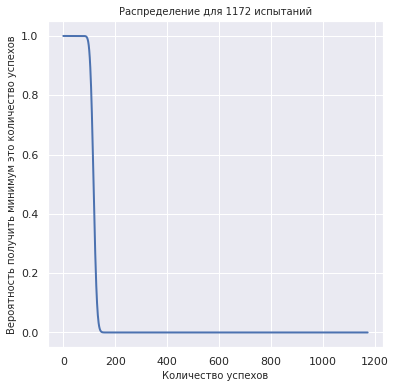

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
x = np.arange(0, n_required+1, 1)
ax.plot(x, st.binom.sf(x, n_required, p), lw=2)
ax.set_xlabel("Количество успехов", fontsize=10)
ax.set_ylabel("Вероятность получить минимум это количество успехов", fontsize=10)
ax.set_title("Распределение для %i испытаний" %n_required, fontsize=10)
plt.show();

### Пуши

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40% получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей. 

Воспользуемся нормальной аппроксимацией биномиального распределения

In [38]:
n = 1000000 #1млн уведомлений
p = 0.4 #вероятность успеха
mu = n * p 
sigma = sqrt(n * p * (1 - p))
distr = st.norm(mu, sigma)
result = distr.cdf(399500)
print(f'Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей: {round(result*100, 2)}%')

Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей: 15.37%


## Вывод

В ходе работы были:
* Проанализированы предоставленные данные, описаны тренды, тенденции и распределения различных показаталей как самих пользователей, так и того, как они взаимодействуют с сервисом. 
* В том числе на этапе исследовательского анализа данных:
    * Продемонстрирована популярность сервиса в городах, участвующих в исследовании.
    * Сравнены различные показатели использования сервиса (продолжительность и расстояния поездок, etc.) двумя основными группами пользователей - владельцев платной подписки и ее не имеющих. Выделены основные предположительные сценарии использования сервиса.
    * Была обнаружена и исключена аномалия в данных - в районе сотни записей с неправдоподобными показателями. Данные были исключены из исследования, на проверку гипотез не повлияли.
* Была агрегирована большая сводная таблица с основными показателями. На ее основе были проверены три гипотезы - две о разницах различных показателей между двумя группами пользователей (с подпиской и без), а так же об износе самокатов. На основе их результатов заказчик может корректировать бизнес стратегию, увеличивать прибыль.
* Были решены две практические задачи для отдела маркетинга - о промокодах и о пушах.